<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سفر نمی‌روم دگر!
</font>
</h1>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    احتمالاً هنگامی‌که بخواهید برای تعطیلات نوروز به یک شهر مانند ارومیه سفر کنید، از طریق موبایل و یا لپ‌تاپ‌ و از مسیر جست‌وجوی گوگل، پیامک تبلیغاتی و یا به‌صورت مستقیم، وارد یک سایت رزرو هتل می‌شوید و بعد از ساخت حساب کاربری، اقدام به جست‌وجو کرده و مقصد و تاریخ ورود/خروج خود را وارد می‌کنید. در نتیجه لیستی از هتل‌ها برای شما، نشان داده‌ می‌شود و در نهایت، شما با کلیک بر روی هتل‌های مختلف، اقدام به مقایسه ی آن‌ها کرده و شاید (🙃) در نهایت یکی از آن‌ها را رزرو کنید.
<br>
در این پروژه شما پس از پیش‌پردازش داده‌ها و حل چالش‌های مربوط به آن، مدلی را آموزش می‌دهید که بر اساس اطلاعات جست‌وجوی کاربران و سایر ویژگی‌های مرتبط با آن، بتواند پیش‌بینی کند که آیا یک کاربر، هتل مشاهده‌شده را رزرو خواهد کرد یا خیر. بدین ترتیب، می‌توان در لحظه برای هر کاربر، متناسب با پیش‌بینی رزرو، تصمیم متناسبی همانند ارائه‌ی تخفیف و یا پیشنهاد سایر هتل‌ها اتخاذ کرد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیاز را وارد کنید. در صورتی‌که نیاز به کتابخانه‌های دیگری دارید نیز می‌توانید آن‌ها را فراخوانی کنید.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [3]:
import keras
print(keras.__version__)

2.15.0


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
به‌دلیل حجم بالای مجموعه‌داده نیاز است آن را جداگانه از <a href="https://drive.google.com/file/d/1jIl8uXsrdRz3ZBxljjQNo0ssDT8LbJBx/view?usp=sharing" target="_blank">این لینک</a> دانلود کرده و فایل‌های داخل آن را استخراج کنید.  توجه داشته باشید که اندازه‌ی مجموعه‌داده حدود ۱۸۰ مگابایت است و اگر قصد دانلود این حجم از داده را ندارید پیشنهاد می‌کنیم از محیط گوگل کولب استفاده کرده و به‌صورت مستقیم با دستور زیر این فایل را روی کولب خود بارگیری کنید.
</font>
</p>

`!gdown 1jIl8uXsrdRz3ZBxljjQNo0ssDT8LbJBx`

<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>رفع مشکل عدم امکان دانلود فایل با <code>gdown</code></b></summary>

اگر در هنگام دانلود فایل به‌کمک <code>gdown</code> با خطای عدم اجازه‌ی دسترسی مواجه شدید، کافیست کد زیر را اجرا کرده و دوباره امتحان کنید.

<span dir=ltr style="direction:ltr;">

`!pip install --upgrade --no-cache-dir gdown`

</span>
</details>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در این سوال، شما به داده‌های جست‌وجوی کاربران دسترسی دارید. فایل آموزش (<code>train.csv</code>)، نتایج جست‌وجوی کاربران را در یک بازه‌ی حدوداً دو ساله شامل می‌شود و حدود ۷ میلیون سطر دارد. فایل آزمون (<code>test.csv</code>) دارای ۳۰۰ هزار سطر از اطلاعات جست‌وجوی کاربران در بازه‌ی حدود ۱ ماه پس از آخرین جست‌وجوی موجود در فایل آموزش است (این سطرها، به‌صورت تصادفی از بین چند میلیون سطر آن ماه، انتخاب شده‌اند).
جدول زیر، ستون‌های موجود در فایل آموزش را توضیح می‌دهد. توجه داشته‌ باشید که هر ردیف این مجموعه‌داده، نشان‌دهنده‌ی جست‌وجوی یک کاربر جهت رزرو هتل است.
     همچنین در مجموعه‌داده‌ی آزمون، ستون <code>is_booking</code> وجود ندارد، زیرا در ادامه از این ستون برای ساخت متغیر هدف مسئله استفاده خواهیم کرد.
    <br> نحوه‌ی روبه‌رو شدن شما با مجموعه‌داده‌ای با این حجم، جزو یکی از چالش‌ها و اهداف طراحی این تمرین بوده‌است.

</font>
</p>


<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| نام ستون | توضیحات ستون |
|:----------:|:------------------:|
| <code>user</code> | شناسه کاربر |
| <code>user_location_country</code> | شناسه‌ی کشور کاربر |
| <code>user_location_region</code> | شناسه‌ی منطقه‌ی کاربر |
| <code>user_location_city</code> | شناسه‌ی شهر کاربر |
| <code>destination_distance</code> | فاصله‌ی فیزیکی بین کاربر و هتل در زمان جست‌وجو‌ (مقدار <code>null</code> به معنی عدم توانایی محاسبه فاصله است) |
| <code>search_date</code> | زمان انجام جست‌وجو |
| <code>is_mobile</code> | آیا کاربر با دستگاه موبایل جست‌وجو انجام داده است؟ |
| <code>is_package</code> | آیا کاربر در حال جست‌وجوی هتل به‌همراه بلیط حمل‌و‌نقل (اتوبوس، هواپیما یا قطار) است؟|
| <code>channel</code> | کاربر از چه کانالی وارد سایت شده‌است؟ (تبلیغات پیامکی، تبلیغات شبکه‌ی اجتماعی، ورود مستقیم و ...)  |
| <code>Search_count</code> |تعداد جست‌وجو‌های مشابه در لحظه‌ی کاربر (در همان نشست یا ‌<i>session</i>)|
| <code>checkIn_date</code> | تاریخ ورود به هتل |
| <code>checkOut_date</code> | تاریخ خروج از هتل |
| <code>n_adults</code> | تعداد افراد بالغ اعلام‌شده جهت رزرو هتل |
| <code>n_children</code> | تعداد کودکان اعلام‌شده جهت رزرو هتل |
| <code>n_rooms</code> | تعداد اتاق مورد نظر برای رزرو |
| <code>destination</code> | شناسه‌ی محل هتل مورد نظر کاربر (با هم‌پوشانی همچون نیویورک، نیویورک سیتی، سنترال پارک و غیره) |
| <code>destination_type</code> | کد نوع هتل مورد نظر کار‌بر |
| <code>hotel_continent</code> | شناسه‌ی قاره‌ی هتل مورد نظر کاربر |
| <code>hotel_country</code> | شناسه‌ی کشور هتل مورد نظر کاربر |
| <code>hotel_market</code> | ناحیه‌ای که هتل مورد نظر کاربر در آن قرار گرفته‌است (بدون هم‌پوشانی همچون نیویورک، بوستون و غیره)|
| <code>hotel_category</code> | گرو‌ه‌بندی هتلی که جزییاتش را مشاهده می‌کنند. این گروه‌بندی می‌تواند بر اساس مواردی مانند چندستاره بودن و یا نوع هتل باشد. |
| <code>is_booking<code> | آیا کاربر در نهایت، هتل مشاهده‌شده را رزرو کرده یا خیر؟ |


</font>
</div>
</center>

In [4]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1jIl8uXsrdRz3ZBxljjQNo0ssDT8LbJBx

Downloading...
From (original): https://drive.google.com/uc?id=1jIl8uXsrdRz3ZBxljjQNo0ssDT8LbJBx
From (redirected): https://drive.google.com/uc?id=1jIl8uXsrdRz3ZBxljjQNo0ssDT8LbJBx&confirm=t&uuid=31d2d274-a704-40a1-bd14-c3af6a90fe73
To: /content/will_not_travel_again_data.zip
100% 188M/188M [00:04<00:00, 39.0MB/s]


In [5]:
import zipfile
with zipfile.ZipFile('will_not_travel_again_data.zip', 'r') as zip_ref:
    zip_ref.extractall()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خوانش مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
   در ابتدا نیاز است فایل‌ مجموعه‌داده را بخوانید. داده‌‌های آموزش را می‌توانید از فایل <code>train.csv</code> موجود در پوشه‌ی <code>data</code> بخوانید و از نمونه‌های موجود در آن برای آموزش مدل استفاده کنید.
 عملکرد مدل شما روی داده‌ی <code>test.csv</code> برسی می‌شود.
</font>
</p>

In [6]:
train = pd.read_csv('data/train.csv', engine='pyarrow')
test = pd.read_csv('data/test.csv', engine='pyarrow')

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
اکتشاف داده‌ها و مهندسی ویژکی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در مرحله اول به بررسی و اکتشاف داده‌ها و مهندسی ویژگی می‌پردازیم. در ابتدا با حذف ستون  <code>user</code> سعی در کم‌کردن حجم داده‌ها می‌کنیم، این عمل با توجه به یکتایی این مقادیر تاثیری در عملکرد مدل نخواهد داشت.
</font>
</p>

In [7]:
train = train.drop(columns = ['user'])
test = test.drop(columns = ['user'])

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
حذف مقادیر گم‌شده
</font>
</h3>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
   ابتدا با بررسی مقادیر گم‌شده در ستون‌های <code>checkIn_date</code> و <code>checkOut_date</code> این مقادیر را مدیریت کنید. در صورتی‌که حداقل ۹۹ درصد نمونه‌های شامل مقادیر گم‌شده در هر ستون دارای <b style="color:#0099cc">متغیر هدف</b> با مقدار <code>0</code> باشند، آن‌ها را حذف کنید، در غیر این‌صورت از روشی دیگری جهت مدیریت آن‌ها بهره ببرید.
</font>
</p>

In [10]:
train.isnull().sum()

user_location_country          0
user_location_region           0
user_location_city             0
destination_distance     2727207
search_date                    0
is_mobile                      0
is_package                     0
channel                        0
search_count                   0
checkIn_date               14292
checkOut_date              14292
n_adults                       0
n_children                     0
n_rooms                        0
destination                    0
destination_type               0
hotel_continent                0
hotel_country                  0
hotel_market                   0
hotel_category                 0
is_booking                     0
dtype: int64

In [11]:
test.isnull().sum()

                             0
user_location_country        0
user_location_region         0
user_location_city           0
destination_distance     98670
search_date                  0
is_mobile                    0
is_package                   0
channel                      0
search_count                 0
checkIn_date                 0
checkOut_date                0
n_adults                     0
n_children                   0
n_rooms                      0
destination                  0
destination_type             0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_category               0
dtype: int64

In [8]:
train.drop(train[(train['checkIn_date'].isnull()) & (train['checkOut_date'].isnull()) & (train['is_booking']==0)].index, inplace=True)

In [13]:
train.isnull().sum()

user_location_country          0
user_location_region           0
user_location_city             0
destination_distance     2721079
search_date                    0
is_mobile                      0
is_package                     0
channel                        0
search_count                   0
checkIn_date                   0
checkOut_date                  0
n_adults                       0
n_children                     0
n_rooms                        0
destination                    0
destination_type               0
hotel_continent                0
hotel_country                  0
hotel_market                   0
hotel_category                 0
is_booking                     0
dtype: int64


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
همان‌طور که در توضیحات ستون‌های مسئله دیدیم ستون <code>destination_distance</code> فاصله‌ی فیزیکی بین کاربر و هتل در زمان جست‌وجو‌ را نشان می‌دهد. از آنجایی که می‌توانیم بگوییم فاصله‌ی محاسبه‌شده دو شهر با یکدیگر همواره ثابت یا در یک محدوده است، برای پر کردن مقادیر گم‌شده‌ای که این فاصله را نشان می‌دهد، می‌توانیم از <code>user_location_city</code> و <code>destination</code> که بیانگر شناسه‌ی شهر کاربر و هتل جست‌وجو شده هستند، استفاده کنیم به‌طوری‌که نمونه‌‌های که ستون‌ <code>destination_distance</code> در آن گم‌شده است، با را با میانگین مقدار  <code>destination_distance</code> در ستون‌هایی که <code>user_location_city</code> و <code>destination</code> مشابه دارند پر کنیم.
</font>
</p>


In [9]:
train['destination_distance'].fillna(train.groupby(['user_location_city'])['destination_distance'].mean(), inplace=True)
test['destination_distance'].fillna(test.groupby(['user_location_city'])['destination_distance'].mean(), inplace=True)

In [10]:
mean = train.isna().mean()['destination_distance']
mean_test = test.isna().mean()['destination_distance']

train['destination_distance'].fillna(mean, inplace = True) #TODO
test['destination_distance'].fillna(mean_test, inplace = True) #TODO


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال برای سایر موارد گم‌شده از عددی مانند <code>0</code> که در این ستون استفاده نشده است، استفاده می‌کنیم.
</font>
</p>


In [16]:
train.isna().sum()

user_location_country    0
user_location_region     0
user_location_city       0
destination_distance     0
search_date              0
is_mobile                0
is_package               0
channel                  0
search_count             0
checkIn_date             0
checkOut_date            0
n_adults                 0
n_children               0
n_rooms                  0
destination              0
destination_type         0
hotel_continent          0
hotel_country            0
hotel_market             0
hotel_category           0
is_booking               0
dtype: int64

In [17]:
test.isna().sum()

                         0
user_location_country    0
user_location_region     0
user_location_city       0
destination_distance     0
search_date              0
is_mobile                0
is_package               0
channel                  0
search_count             0
checkIn_date             0
checkOut_date            0
n_adults                 0
n_children               0
n_rooms                  0
destination              0
destination_type         0
hotel_continent          0
hotel_country            0
hotel_market             0
hotel_category           0
dtype: int64

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ویژگی‌های زمانی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
با بررسی ستون‌های مجموعه‌داده مشاهده می‌کنیم که سه ستون <code>checkOut_date</code>، <code>checkOut_date</code> و <code>search_date</code> بیانگر زمان هستند و می‌توان با تبدیل این مقادیر به <code>datetime64[ns]</code>  از آن‌ها اطلاعات و حتی ویژگی‌های جدید و مناسبی استخراج کرد. برای این‌کار از دستور زیر استفاده کنید. البته اکیداً توصیه می‌شود مستندات مربوط به کار با این نوع داده‌ها را بررسی کنید.
</font>


In [11]:
time_columns = ['search_date', 'checkIn_date', 'checkOut_date']

for col in time_columns:
  train[col]= pd.to_datetime(train[col])
  test[col]= pd.to_datetime(test[col])


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در ابتدا شاید این سه ستون زمانی اطلاعات خوبی به مدل ندهند اما با بررسی دقیق‌تر می‌توانیم دو ویژگی جدید که تعیین‌کننده‌ی  <b>تعداد روز‌های بین زمان جست‌وجو و زمان تعیین‌شده برای ورود</b> و همچنین <b>تعداد روز‌های اقامت تعیین‌شده در جست‌وجو</b> هستند را به مجموعه داده اضافه کنیم.
</font>
</p>

In [12]:
train['duration'] = (train['checkOut_date'] - train['checkIn_date']).dt.days
test['duration'] = (test['checkOut_date'] - test['checkIn_date']).dt.days

train['days_between'] = (train['checkIn_date'] - train['search_date']).dt.days
test['days_between'] = (test['checkIn_date'] - test['search_date']).dt.days

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همچنین می‌توانیم با بررسی ساعت، شماره روز‌ هفته و ماه زمان جست‌وجو و ورود به هتل، ارتباط آن‌ها را با رزرو هتل بررسی کنیم. بنابراین ستونی‌های جدول زیر را به مجموعه‌داده اضافه کنید.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| نام ستون | توضیحات ستون |
|:-:|:-:|
|<code>search_date_hour</code>|ساعت جست‌وجو |
|<code>search_date_dayofweek</code>|روز جست‌وجو در هفته|
|<code>checkIn_date_dayofweek</code>|روز ورود در هفته|
|<code>search_date_month</code>|ماه جست‌وجو|
|<code>checkIn_date_month</code>|ماه ورود|

</font>
</div>
</center>


In [13]:
train['search_date_hour'] = train['search_date'].dt.hour
train['search_date_dayofweek'] = train['search_date'].dt.dayofweek
train['checkIn_date_dayofweek'] = train['checkIn_date'].dt.dayofweek
train['search_date_month'] = train['search_date'].dt.month
train['checkIn_date_month'] = train['checkIn_date'].dt.month

test['search_date_hour'] = test['search_date'].dt.hour
test['search_date_dayofweek'] = test['search_date'].dt.dayofweek
test['checkIn_date_dayofweek'] = test['checkIn_date'].dt.dayofweek
test['search_date_month'] = test['search_date'].dt.month
test['checkIn_date_month'] = test['checkIn_date'].dt.month

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
 حال برای ‌بررسی رابطه‌ی بین ویژگی‌هایی که در مرحله قبل به‌دست آوردیم با متغیر هدف (این‌که جست‌وجو به رزرو هتل منجر شده‌است یا خیر) دو دیتافرم <code>is_booked</code> و <code>not_booked</code> را براساس مجموعه‌داده‌ی آموزش ایجاد کنید، به‌طوری‌که دیتافرم اول فقط نمونه‌هایی که به رزرو ختم شده‌اند و دیتافریم دوم فقط نمونه‌هایی که به رزرو ختم نشده‌اند را شامل شود.
</font>
</p>


In [14]:
is_booked = train[train['is_booking'] == 1]
not_booked = train[train['is_booking'] == 0]

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مصورسازی ۱
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
اکنون بیاید با استفاده از مصورسازی، بینش‌های بیشتری را از دل این داده‌ها استخراج کنیم.
در این مرحله نیاز است یک نمودار میله‌ای رسم کنید تا رابطه‌ی بین درصد جست‌وجو‌هایی که به رزرو هتل ختم شده‌اند و نشده‌اند‌ (هر کدام نسبت به دسته‌ی خودشان) در ساعات مختلف را نشان دهد.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
خروجی نمودار شما باید شبیه به تصویر زیر باشد.
</font>
</p>

<center>
<img src = 'https://quera.org/qbox/view/6TWauQwG58/search_hour.png'>
</center>

In [44]:
import plotly.graph_objects as go

trace_is_booked = go.Bar(y = is_booked.groupby(['search_date_hour'])['is_booking'].count() / len(is_booked) , name='Not Booked') # TODO
trace_not_booked = go.Bar(y = not_booked.groupby(['search_date_hour'])['is_booking'].count() / len(not_booked) , name='Booked') # TODO

# در ادامه‌ی این قسمت از کد تغییری ایجاد نکنید زیرا نمودار شما توسط سیستم داوری بررسی می‌شود و تغییر در این قسمت ممکن است باعث عدم داوری صحیح شود

data = [trace_is_booked, trace_not_booked]

layout = go.Layout(
    xaxis=dict(title='Search Hour', tickangle=45, automargin=True),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_json('./search_hour.json')


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در این مرحله می‌توانید با توجه به زمان‌های مختلفی که جست‌وجو در آن انجام شده و رابطه‌ی بین آن با رزرو هتل، مقادیر این ستون را به دسته‌های کوچک‌تری افراز کنید (binning).
          به‌طور مثال به نمونه‌هایی که در آن‌ها جست‌وجو بین ساعت ۵ تا ۱۵ انجام شده‌است، مقدار <code>1</code>
          </font> دهید و به بقیه نمونه‌ها مقدار  <code>0</code> دهید. این عمل یک نوع مهندسی ویژگی به شمار می‌آید. توجه کنید این دسته‌بندی اختیاری بوده است و به‌طور مستقیم داوری نمی‌شود، اما ممکن است در عملکرد مدل شما تاثیر (مثبت یا منفی!) بگذارد، همچنین برای سایر ستون‌ها و ویژگی‌ها نیز با خلاقیت خودتان می‌توانید ویژگی‌های جدیدی خلق کنید.
</p>



<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مصورسازی ۲
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همانند نمودار قبل برای روز ورود به هتل  نیز نمودار را رسم کنید. دقت داشته باشید روز‌های هفته به‌صورت، دوشنبه، سه‌شنبه تا شنبه و به همین ترتیب باشد. به رعایت نیم‌فاصله در اسامی روزها توجه داشته باشید. کلمه‌ی سه‌شنبه و پنج‌شنبه دارای نیم‌فاصله است.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
خروجی نمودار شما باید به‌صورت زیر باشد.
</font>
</p>

<center>
<img src = 'https://quera.org/qbox/view/jqISJX07yD/checkIn_day.png'>
</center>


In [45]:
day_counts_is = is_booked.groupby(['checkIn_date_dayofweek'])['is_booking'].count() / len(is_booked)
day_counts_not = not_booked.groupby(['checkIn_date_dayofweek'])['is_booking'].count() / len(not_booked)

In [46]:
trace_not_booked = go.Bar(y = day_counts_not , name='Not Booked')
trace_is_booked = go.Bar(y = day_counts_is , name='Booked')

ticktext = ["دوشنبه","سه‌شنبه","چهارشنبه","پنج‌شنبه","جمعه","شنبه","بکشنبه"]

# در ادامه‌ی این قسمت از کد تغییری ایجاد نکنید زیرا نمودار شما توسط سیستم داوری بررسی می‌شود و تغییر در این قسمت ممکن است باعث عدم داوری صحیح شود

data = [trace_is_booked, trace_not_booked]

layout = go.Layout(
    xaxis=dict(title='Day of Week', tickangle=45, automargin=True,
               tickvals = [0,1,2,3,4,5,6], ticktext= ticktext
 ),
    yaxis=dict(title='Frequency'),
)

fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_json('./checkIn_day.json')

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مصورسازی ۳
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همانند نمودار قبل برای ماه ورود نیز نمودار را رسم کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
خروجی نمودار شما باید مشابه با تصویر زیر باشد.
</font>
</p>

<center>
<img src = 'https://quera.org/qbox/view/vdWwvplc3K/checkIn_date_month.png'>
</center>

In [47]:
month_counts_is = is_booked.groupby(['checkIn_date_month'])['is_booking'].count() / len(is_booked)
month_counts_not = not_booked.groupby(['checkIn_date_month'])['is_booking'].count() / len(not_booked)

In [48]:
trace_not_booked = go.Bar(y = month_counts_not , name='Not Booked') # TODO
trace_is_booked = go.Bar(y = month_counts_is , name='Booked') # TODO

# در ادامه‌ی این قسمت از کد تغییری ایجاد نکنید زیرا نمودار شما توسط سیستم داوری بررسی می‌شود و تغییر در این قسمت ممکن است باعث عدم داوری صحیح شود

data = [trace_is_booked, trace_not_booked]

ticktext = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

layout = go.Layout(
    xaxis=dict(title='Month', tickangle=45, automargin=True,
             ticktext = ticktext ,tickvals = np.arange(0,12)),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_json('./checkIn_date_month.json')


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
در صورت علاقه می‌توانید ماه‌های سال را به فصل نیز تبدیل کنید (مانند پیشنهادی که برای ساعت جست‌وجو داده شد).
</p>


In [49]:
def check_condition(value):
    # Your custom condition logic here
    if value in [1,2,3]:
        return 1
    elif value in [4,5,6]:
        return 2
    elif value in [7,8,9]:
        return 3
    else:
        return 4

In [50]:
is_booked['season'] =  is_booked['checkIn_date_month'].apply(check_condition)
not_booked['season'] =  not_booked['checkIn_date_month'].apply(check_condition)

<ipython-input-50-f795ce5c7995>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-f795ce5c7995>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
trace_not_booked = go.Bar(y = not_booked.groupby(['season'])['is_booking'].count() / len(not_booked) , name='Not Booked') # TODO
trace_is_booked = go.Bar(y = is_booked.groupby(['season'])['is_booking'].count() / len(is_booked) , name='Booked') # TODO

# در ادامه‌ی این قسمت از کد تغییری ایجاد نکنید زیرا نمودار شما توسط سیستم داوری بررسی می‌شود و تغییر در این قسمت ممکن است باعث عدم داوری صحیح شود

data = [trace_is_booked, trace_not_booked]

ticktext = ['بهار', 'تابستان', 'پاییز', 'زمستان']

layout = go.Layout(
    xaxis=dict(title='Month', tickangle=45, automargin=True,
             ticktext = ticktext ,tickvals = np.arange(0,12)),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_json('./checkIn_date_month.json')

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مصورسازی ۴
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
نمودار خطی برای فاصله‌ی زمانی بین جست‌وجو و ورود را نیز رسم کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
خروجی نمودار شما باید به صورت زیر باشد.
</font>
</p>
<center>
<img src = 'https://quera.org/qbox/view/mEwuo0YTeE/days_between.png'>
</center>

In [52]:
day_between_is  =  is_booked.groupby(['days_between'])['is_booking'].count() / len(is_booked)
day_between_not  = not_booked.groupby(['days_between'])['is_booking'].count() / len(not_booked)

In [53]:
trace_is_booked = go.Scatter(y = day_between_is  , name='Not Booked')
trace_not_booked = go.Scatter(y = day_between_not , name='Booked', opacity = 0.5)

# در ادامه‌ی این قسمت از کد تغییری ایجاد نکنید زیرا نمودار شما توسط سیستم داوری بررسی می‌شود و تغییر در این قسمت ممکن است باعث عدم داوری صحیح شود

data = [trace_is_booked, trace_not_booked]

layout = go.Layout(
    xaxis=dict(title='Days between search and checking time', tickangle=45, automargin=True),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_json('./days_between.json')

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مصورسازی ۵
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
همچون نمودار بالا یک نمودار برای مدت اقامت نیز رسم کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir">
خروجی نمودار شما باید به‌صورت زیر باشد.
</font>
</p>

<center>
<img src = 'https://quera.org/qbox/view/iOh4Yzgkf6/los.png'>
</center>

In [54]:
day_duration_is  =  is_booked.groupby(['duration'])['is_booking'].count() / len(is_booked)
day_duration_not  = not_booked.groupby(['duration'])['is_booking'].count() / len(not_booked)

In [55]:
trace_not_booked = go.Scatter(y = day_duration_not , name='Not Booked', opacity = 0.5) # TODO
trace_is_booked = go.Scatter(y = day_duration_is  , name='Booked') # TODO

# در ادامه‌ی این قسمت از کد تغییری ایجاد نکنید زیرا نمودار شما توسط سیستم داوری بررسی می‌شود و تغییر در این قسمت ممکن است باعث عدم داوری صحیح شود

data = [trace_is_booked, trace_not_booked]

layout = go.Layout(
    xaxis=dict(title='Length of Stay', tickangle=45, automargin=True),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_json('./los.json')

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خارجی یا داخلی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
تا اینجا داده‌های زمانی را مورد بررسی قرار دادیم و سعی کردیم کمی در آن‌‌ها اکتشاف کنیم.
حال با توجه به داده‌های دیگر می‌توانیم اکتشافات دیگری انجام دهیم. <br>ستونی با نام <code>is_abroad</code> ایجاد کنید و در آن جست‌وجو‌ها برای هتل‌های خارج از کشور کاربر را مشخص کنید.
به‌طور مثال اگر کاربر در کشوری با شناسه‌ی <code>x</code> است و در جست‌وجوی خود هتلی در کشوری غیر از <code>x</code> را جست‌وجو ستون <code>is_abroad</code> را برای این نمونه برابر <code>1</code> قرار دهید.
</font>
</p>


In [15]:
train['is_abroad'] = np.where(train['user_location_country'] == train['hotel_country'], 1, 0)
test['is_abroad'] = np.where(test['user_location_country'] == test['hotel_country'], 1, 0)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
🤓 بیشتر
</font>
</h3>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
از آن‌جا که این مجموعه‌داده شامل ویژگی‌های متعدد و متنوعی است، می‌توانید به غیر از موارد خواسته‌شده، از جنبه‌های مختلفی به تحلیل داده‌ها بپردازید. برای مثال می‌توانید توزیع‌های سایر ویژگی‌ها را بررسی کنید، ارتباط ویژگی‌ها با هم و با متغیر هدف را بررسی کنید. همچنین با توجه به بینش‌هایی که از داده‌ها به‌دست می‌آورید، می‌توانید به پیش‌پردازش داده‌ها بپردازید تا ورودی‌های باکیفیت‌تری را برای مدل خود آماده کنید. این بخش به‌صورت جداگانه مورد داوری قرار نمی‌گیرد و دست شما باز است تا از هر تکنیکی که برای بهبود عملکرد مدل خود لازم می‌دانید استفاده کنید.
در انجام مراحل پیش‌پردازش و مهندسی ویژگی، می‌توانید موارد زیر را انجام دهید. همچنین توجه داشته باشید در نهایت مجموعه‌داده آموزش و آزمون باید ساختاری مشابه یکدیگر داشته باشند.

<ul dir=rtl>
<li dir=rtl>
 مدیریت ویژگی‌های دسته‌ای ترتیبی و اسمی (توجه داشته باشید با این‌که داده‌های مجموعه‌داده‌ی اولیه از نوع عدد هستند اما الزاماً اعداد آن‌ها بار معنایی از نظر ریاضی ندارند و با برخی از آن‌ها باید همچون ویژگی‌های دسته‌ای برخورد کنید و شاید برای بهبود مدل نیاز به مدیریت این داده‌ها داشته باشید.)
    </li>
    <li dir=rtl>
        در بعضی موارد حذف بعضی ستون‌ها به بهبود مدل کمک می‌کند، به‌طور مثال در مرحله‌ی قبل ستونی برای خارجی بودن هتل ایجاد کردیم، حال ممکن است دیگر نیازی به کشور کاربر و یا هتل با توجه به ستون جدید نداشته باشیم.
    </li>
       <li dir=rtl>
           با بررسی توزیع مجموعه‌داده متوجه می‌شوید که این مجموعه‌داده متوازن نیست، بنابراین نحوه‌ی مدیریت این چالش نیز می‌تواند در مدل شما تاثیر بگذارد.
    </li>
</ul>
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
توجه داشته باشید که کدنویسی سلول‌های زیر کاملاً اختیاری است.
</font>
</p>

In [16]:
train.drop(columns=['user_location_country', 'user_location_region', 'user_location_city', 'hotel_continent', 'hotel_country'], inplace=True)
test.drop(columns=['user_location_country', 'user_location_region', 'user_location_city', 'hotel_continent', 'hotel_country'], inplace=True)

In [17]:
train.drop(columns=['search_date', 'checkIn_date', 'checkOut_date'], inplace=True)
test.drop(columns=['search_date', 'checkIn_date', 'checkOut_date'], inplace=True)

In [37]:
is_booked.groupby(['channel'])['is_booking'].count()

channel
0      73217
1      59213
2      35895
3      18315
4      24418
5      42196
6        609
7       2653
8       2123
9     403088
10       140
Name: is_booking, dtype: int64

In [ ]:
trace_is_booked = go.Scatter(y = is_booked.groupby(['channel'])['is_booking'].count() / len(is_booked)  , name='Not Booked')
trace_not_booked = go.Scatter(y = not_booked.groupby(['channel'])['is_booking'].count() / len(not_booked) , name='Booked', opacity = 0.5)

# در ادامه‌ی این قسمت از کد تغییری ایجاد نکنید زیرا نمودار شما توسط سیستم داوری بررسی می‌شود و تغییر در این قسمت ممکن است باعث عدم داوری صحیح شود

data = [trace_is_booked, trace_not_booked]

layout = go.Layout(
    xaxis=dict(title='Days between search and checking time',  tickvals = [0,1,2,3,4,5,6,7,8,9,10],
             ticktext = [1,2,3,4,5,6,7,8,9,10, 11] ),
    yaxis=dict(title='Frequency')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
is_booked.groupby(['hotel_category'])['is_booking'].count()

hotel_category
0      4291
1      9075
2      9890
3      3159
4      7980
      ...  
95    12527
96     3754
97     6461
98    10470
99     8685
Name: is_booking, Length: 100, dtype: int64

In [ ]:
is_booked.groupby(['is_mobile'])['is_booking'].count()
not_booked.groupby(['is_mobile'])['is_booking'].count()

is_mobile
0    6011811
1     935030
Name: is_booking, dtype: int64

In [ ]:
trace_is_booked = go.Bar(y = is_booked.groupby(['is_mobile'])['is_booking'].count() / len(is_booked), name = 'Booked')
trace_not_booked = go.Bar(y = not_booked.groupby(['is_mobile'])['is_booking'].count() / len(not_booked), name = 'NOT Booked')

data = [trace_is_booked, trace_not_booked]

layout = go.Layout(barmode='group',
    xaxis=dict(title='is_mobile',  tickvals = [0,1],
             ticktext = ['No', 'Yes']),
    yaxis=dict(title='count')
)

fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
trace_is_booked = go.Pie(labels =['is_mobile','Not_mobile'], values = is_booked.groupby(['is_mobile'])['is_booking'].count() / len(is_booked))

data = [trace_is_booked]

fig = go.Figure(data=data)

fig.show()

In [19]:
dummy_columns = ['n_children', 'n_rooms', 'destination_type']

train = pd.get_dummies(train, columns = dummy_columns, dtype=int)
test = pd.get_dummies(test, columns = dummy_columns, dtype=int)

In [27]:
for i in train.columns:
  if i not in test.columns:
    print(i)

is_booking
destination_type_0


In [ ]:
dummy_columns = ['n_adults', 'search_count']

train = pd.get_dummies(train, columns = dummy_columns, dtype=int)
test = pd.get_dummies(test, columns = dummy_columns, dtype=int)

In [20]:
#test['channel_10'] = 0
test['destination_type_0'] = 0

In [41]:
train.shape

(7608708, 45)

In [42]:
test.shape

(325821, 45)

In [18]:
for column in train.columns:
  mean = train[column].mean()
  std = train[column].std()
  if column != 'is_booking':
      train[column] = (train[column]- mean)/std
      test[column]=  (test[column] - mean)/std

test.head()

,,destination_distance,is_mobile,is_package,channel,search_count,n_adults,n_children,n_rooms,destination,...,hotel_market,hotel_category,duration,days_between,search_date_hour,search_date_dayofweek,checkIn_date_dayofweek,search_date_month,checkIn_date_month,is_abroad
0,0,-0.405571,-0.388874,-0.564091,0.806705,-0.414987,2.216061,-0.480786,-0.246051,-1.228194,...,1.000207,-0.370850,-0.778692,-0.632595,-0.277550,-1.500006,0.947868,1.718661,1.51101,-0.035778
1,1,3.047688,-0.388874,-0.564091,-1.617266,-0.414987,-1.121734,-0.480786,-0.246051,-0.516692,...,0.795520,0.250071,-0.778692,-0.650075,-0.101858,-1.500006,0.420978,1.718661,1.51101,-0.035778
2,2,-0.624047,-0.388874,1.772764,0.806705,-0.414987,-1.121734,-0.480786,-0.246051,-0.566447,...,-1.141138,0.698513,-0.778692,-0.545193,0.425220,-1.500006,-0.105912,1.718661,1.51101,-0.035778
3,3,0.399848,-0.388874,-0.564091,0.806705,-0.414987,-0.009136,-0.480786,1.967806,-0.564064,...,1.242289,-0.991770,-0.778692,-0.789918,-0.277550,-1.500006,-0.105912,1.718661,1.51101,-0.035778
4,4,0.401400,-0.388874,-0.564091,0.806705,-0.414987,-0.009136,-0.480786,-0.246051,4.101610,...,2.883725,0.112088,0.240977,-0.597634,-0.453243,-1.500006,-1.686582,1.718661,1.51101,-0.035778


In [ ]:
# TODO: Preprocessing (Encode Categorical Columns) (Optional)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_to_encode = None # Optional

for column in columns_to_encode:
    train.loc[:, column] = le.fit_transform(train[column])
    test.loc[:, column] = le.transform(test[column])

In [19]:
X = train.drop(columns=['is_booking'])
Y = train['is_booking']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2) # Optional

In [21]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 2)

In [ ]:
y_valid = to_categorical(y_valid, num_classes = 2)

In [47]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
پس از آماده‌سازی داده‌ها نوبت به ساخت شبکه‌ی عصبی می‌رسد. باز هم دست‌تان باز است تا معماری موردنظر خود را طراحی کنید و از هر تکنیکی که لازم می‌دانید جهت بهتر کردن فرآیند آموزش مدل استفاده کنید. پیشنهاد می‌کنیم تکنیک‌های مختلفی که تا اینجای دوره آموخته‌اید را آزمایش کرده و به تفسیر نتایج بپردازید.
دقت داشته باشید در خروجی مدل باید احتمال رزرو شدن هتل را پیش‌بینی کنید. به عبارت بهتر احتمال <code>1</code>
 شدن ستون <code>is_booking</code>
 را تخمین بزنید.
همچنین توجه داشته باشید که برای ارزیابی مدل شما از معیار <code>AUC</code> یعنی سطح زیر منحنی نمودار <code>ROC</code> استفاده می‌شود. برای مطالعه بیشتر در مورد این نمودار می‌توانید <a href = 'https://en.wikipedia.org/wiki/Receiver_operating_characteristic'> ویکی‌پدیا </a>
    یا <a href = 'https://stanford.edu/~shervine/l/fa/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks'> راهنمای کوتاه نکات و ترفندهای یادگیری ماشین </a>
 را مطالعه کنید.
</font>
</p>

In [68]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(20,)))
model.add(keras.layers.Flatten())
'''model.add(keras.layers.Dense(15, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.LayerNormalization())'''
model.add(keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.LayerNormalization())
model.add(keras.layers.Dense(2, activation='softmax'))

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 20)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 layer_normalization_4 (Lay  (None, 10)                20        
 erNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 2)                 22        
                                                                 
Total params: 252 (1008.00 Byte)
Trainable params: 252 (1008.00 Byte)
Non-trainable params: 0 (0.00 Byte)
______________

In [25]:
X_train.shape

(6086966, 20)

In [70]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [71]:
epochs = 5
BATCH_SIZE = 3000

checkpoint_cb = keras.callbacks.ModelCheckpoint('travel.keras',
                                                monitor = 'val_acc',
                                                mode = 'max',
                                                save_best_only = True)

history = model.fit(X_train, y_train,
                    epochs = epochs,
                    batch_size = BATCH_SIZE,
                    callbacks = checkpoint_cb,
                    validation_split = 0.2)

Epoch 1/5
1624/1624 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.8905

1624/1624 [==============================] - 14s 8ms/step - loss: 0.3524 - accuracy: 0.8905 - val_loss: 0.2764 - val_accuracy: 0.9130
Epoch 2/5
1623/1624 [============================>.] - ETA: 0s - loss: 0.2868 - accuracy: 0.9130

1624/1624 [==============================] - 8s 5ms/step - loss: 0.2868 - accuracy: 0.9130 - val_loss: 0.2734 - val_accuracy: 0.9130
Epoch 3/5
1621/1624 [============================>.] - ETA: 0s - loss: 0.2818 - accuracy: 0.9130

1624/1624 [==============================] - 11s 7ms/step - loss: 0.2818 - accuracy: 0.9130 - val_loss: 0.2782 - val_accuracy: 0.9130
Epoch 4/5
1622/1624 [============================>.] - ETA: 0s - loss: 0.2785 - accuracy: 0.9130

1624/1624 [==============================] - 8s 5ms/step - loss: 0.2785 - accuracy: 0.9130 - val_loss: 0.2739 - val_accuracy: 0.9129
Epoch 5/5
1618/1624 [============================>.] - ETA: 0s - loss: 0.2774 - accuracy: 0.9130

1624/1624 [==============================] - 11s 7ms/step - loss: 0.2774 - accuracy: 0.9130 - val_loss: 0.2740 - val_accuracy: 0.9067


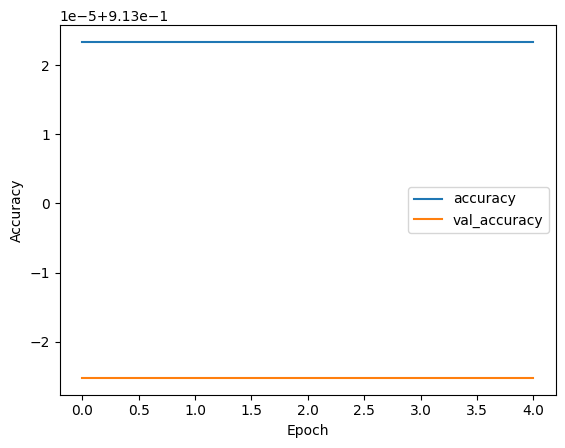

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌بینی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در فایل <code>test.csv</code> لیستی از نمونه‌های آزمون در اختیار شما قرار گرفته و نیاز است به‌ازای هر کدام از آن‌ها احتمال رزرو هتل را پیش‌بینی کنید. پیشنهاد می‌کنیم برای اطمینان از عملکرد مدل خود و بهبود آن، ابتدا آن را بر روی یک مجموعه‌ی اعتبارسنجی آزمایش کنید.
</font>
</p>


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای ارزیابی عملکرد مدل شما بر روی نمونه‌های آزمون از معیار <code>AUC</code> نمودار <code>ROC</code> استفاده می‌کنیم.
</font>
</p>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>76.5</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

In [65]:
y_p = model.predict(X_valid, batch_size = 3000)

508/508 [==============================] - 2s 4ms/step


In [66]:
y_p = np.argmax(y_p, axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid, y_p)

0.5

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ساختار خروجی برای نمونه‌های آزمون
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اکنون نیاز است به‌ازای هر نمونه‌ی آزمون <b style="color:#0099cc">احتمال</b> رزرو هتل را پیش‌بینی کنید.
 پیش‌بینی مدل خود را برای نمونه‌های آزمون تولید کرده و در ستون <code>prediction</code> دیتافریمی با نام <code>submission</code> ذخیره کنید. توجه داشته باشید که ترتیب مقادیر این ستون باید دقیقاً معادل با ترتیب نمونه‌های آزمون باشد. به این معنی که  ردیف i ام ستون <code>submission</code>، پیش‌بینی شما برای سطر ردیف <code>i</code> ام فایل آزمون باشد (دقت کنید که این ستون باید حتماً دارای <code>header</code> باشد).  همچنین از آنجایی که این ستون بیانگر احتمال است مقادیر این ستون باید مقداری <b>بین</b> <code>0</code> تا <code>1</code> باشد.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
یک نمونه‌ی فرضی از دیتافریم <code>submission</code> در جدول زیر نمایش داده شده است.
 </font>
</p>
<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

|<code>prediction</code>|
|:------:|
|0.723|
|0.516|
|0.281|
| ... |

    
</font>
</div>
</center>

In [38]:
test.drop(columns=[""], inplace=True)

In [39]:
predicts = model.predict(test, batch_size = 128)



2546/2546 [==============================] - 8s 3ms/step


NameError: name 'DataFrame' is not defined

In [41]:
predicts = np.argmax(predicts, axis=1)

In [42]:
submission = pd.DataFrame(predicts, columns= ['prediction'])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد. همچنین اگر از گوگل کولب استفاده می‌کنید، در صورت نیاز به پشتیبانی حتماً آخرین نسخه از نت‌بوک را به‌صورت دستی دانلود کرده و داخل فایل ارسالی قرار دهید یا لینک کولب را با ما به‌اشتراک بگذارید.
</font>
</p>

In [56]:
import zipfile
import joblib
import os

if not os.path.exists(os.path.join(os.getcwd(), 'will_not_travel_again.ipynb')):
    %notebook -e will_not_travel_again.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)
file_names = ['will_not_travel_again.ipynb', 'submission.csv',
              'search_hour.json', 'checkIn_date_month.json',
              'checkIn_day.json', 'days_between.json', 'los.json']
compress(file_names)

File Paths:
['will_not_travel_again.ipynb', 'submission.csv', 'search_hour.json', 'checkIn_date_month.json', 'checkIn_day.json', 'days_between.json', 'los.json']
